In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


602

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | dubbo
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | karagay
Processing Record 5 of Set 1 | barcelona
Processing Record 6 of Set 1 | camacha
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | roebourne
Processing Record 9 of Set 1 | millinocket
Processing Record 10 of Set 1 | kazachinskoye
Processing Record 11 of Set 1 | ponte de sor
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | erbaa
Processing Record 21 of Set 1 | sisimiut
Processing Record 22 of Set 1 | guerrero negro
Processing Reco

Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | qaanaaq
Processing Record 39 of Set 4 | ahuimanu
Processing Record 40 of Set 4 | marystown
Processing Record 41 of Set 4 | buchanan
Processing Record 42 of Set 4 | butaritari
Processing Record 43 of Set 4 | farafangana
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | bien hoa
Processing Record 49 of Set 4 | tromso
Processing Record 50 of Set 4 | saskylakh
Processing Record 1 of Set 5 | boyolangu
Processing Record 2 of Set 5 | hofn
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | samagaltay
Processing Record 5 of Set 5 | itarema
Processing Record 6 of Set 5 | isla vista
Processing Record 7 of Set 5 | nichlaul
Processing Record 8 of Set 5 | nguiu
City not found. Skipping...
Processing Record 9 of Set 5 | windhoek
Processing Record 10 of Se

Processing Record 25 of Set 8 | valdobbiadene
Processing Record 26 of Set 8 | dalnegorsk
Processing Record 27 of Set 8 | shimanovsk
Processing Record 28 of Set 8 | ahipara
Processing Record 29 of Set 8 | berlevag
Processing Record 30 of Set 8 | sarkand
Processing Record 31 of Set 8 | bandarbeyla
Processing Record 32 of Set 8 | shenzhen
Processing Record 33 of Set 8 | gurgan
City not found. Skipping...
Processing Record 34 of Set 8 | puerto cabezas
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | gashua
Processing Record 37 of Set 8 | esperance
Processing Record 38 of Set 8 | yenagoa
Processing Record 39 of Set 8 | ranong
Processing Record 40 of Set 8 | homa bay
Processing Record 41 of Set 8 | viksoyri
City not found. Skipping...
Processing Record 42 of Set 8 | fountain
Processing Record 43 of Set 8 | urumqi
Processing Record 44 of Set 8 | praya
Processing Record 45 of Set 8 | svetlogorsk
Processing Record 46 of Set 8 | westport
Processing Record 47 of Set 8 | qa

Processing Record 13 of Set 12 | muroto
Processing Record 14 of Set 12 | tandalti
Processing Record 15 of Set 12 | yulara
Processing Record 16 of Set 12 | neiafu
Processing Record 17 of Set 12 | nowy tomysl
Processing Record 18 of Set 12 | barabinsk
Processing Record 19 of Set 12 | bredy
Processing Record 20 of Set 12 | manali
Processing Record 21 of Set 12 | katangli
Processing Record 22 of Set 12 | linden
Processing Record 23 of Set 12 | tuktoyaktuk
Processing Record 24 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 25 of Set 12 | nizwa
Processing Record 26 of Set 12 | kopavogur
Processing Record 27 of Set 12 | kitui
Processing Record 28 of Set 12 | chongwe
Processing Record 29 of Set 12 | olga
Processing Record 30 of Set 12 | cabo san lucas
Processing Record 31 of Set 12 | pacific grove
Processing Record 32 of Set 12 | benton harbor
Processing Record 33 of Set 12 | muros
Processing Record 34 of Set 12 | yeppoon
Processing Record 35 of Set 12 | richards bay

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,68.61,95,100,4.90,US,2021-07-19 00:50:49
1,Dubbo,-32.2500,148.6167,51.93,62,75,9.22,AU,2021-07-19 00:52:24
2,Busselton,-33.6500,115.3333,49.05,78,100,8.93,AU,2021-07-19 00:51:38
3,Karagay,58.2667,54.9368,58.46,90,0,3.71,RU,2021-07-19 00:52:25
4,Barcelona,41.3888,2.1590,79.61,67,20,4.00,ES,2021-07-19 00:48:08
5,Camacha,33.0833,-16.3333,65.62,77,40,9.22,PT,2021-07-19 00:52:25
6,Vaini,-21.2000,-175.2000,80.76,83,40,8.05,TO,2021-07-19 00:52:25
7,Roebourne,-20.7833,117.1333,73.83,27,62,12.24,AU,2021-07-19 00:52:26
8,Millinocket,45.6573,-68.7098,66.31,92,90,0.00,US,2021-07-19 00:52:26
9,Kazachinskoye,57.6953,93.2761,58.44,95,100,3.24,RU,2021-07-19 00:52:26


In [10]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-07-19 00:50:49,42.6001,-73.9662,68.61,95,100,4.90
1,Dubbo,AU,2021-07-19 00:52:24,-32.2500,148.6167,51.93,62,75,9.22
2,Busselton,AU,2021-07-19 00:51:38,-33.6500,115.3333,49.05,78,100,8.93
3,Karagay,RU,2021-07-19 00:52:25,58.2667,54.9368,58.46,90,0,3.71
4,Barcelona,ES,2021-07-19 00:48:08,41.3888,2.1590,79.61,67,20,4.00
5,Camacha,PT,2021-07-19 00:52:25,33.0833,-16.3333,65.62,77,40,9.22
6,Vaini,TO,2021-07-19 00:52:25,-21.2000,-175.2000,80.76,83,40,8.05
7,Roebourne,AU,2021-07-19 00:52:26,-20.7833,117.1333,73.83,27,62,12.24
8,Millinocket,US,2021-07-19 00:52:26,45.6573,-68.7098,66.31,92,90,0.00
9,Kazachinskoye,RU,2021-07-19 00:52:26,57.6953,93.2761,58.44,95,100,3.24


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today



'07/18/21'

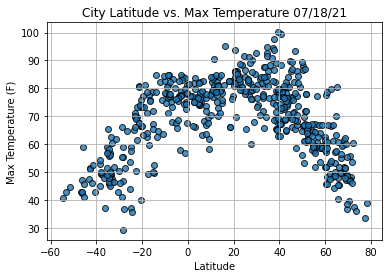

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

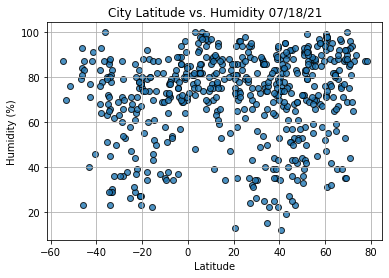

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


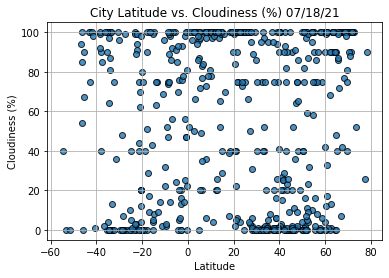

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

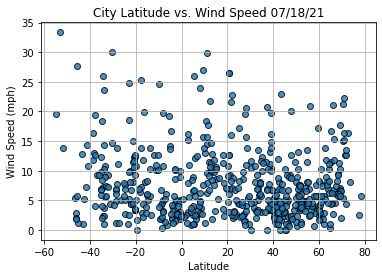

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [21]:
 #Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [22]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

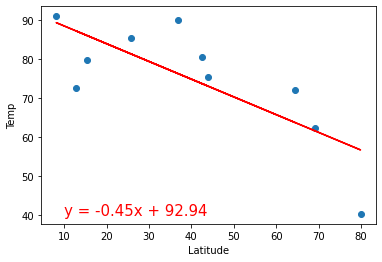

In [23]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [27]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-07-19 00:50:49,42.6001,-73.9662,68.61,95,100,4.90
3,Karagay,RU,2021-07-19 00:52:25,58.2667,54.9368,58.46,90,0,3.71
4,Barcelona,ES,2021-07-19 00:48:08,41.3888,2.1590,79.61,67,20,4.00
5,Camacha,PT,2021-07-19 00:52:25,33.0833,-16.3333,65.62,77,40,9.22
8,Millinocket,US,2021-07-19 00:52:26,45.6573,-68.7098,66.31,92,90,0.00


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

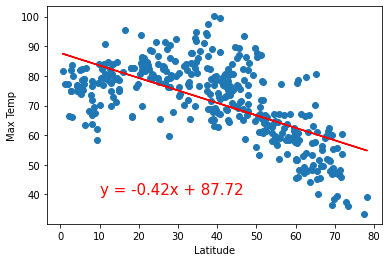

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

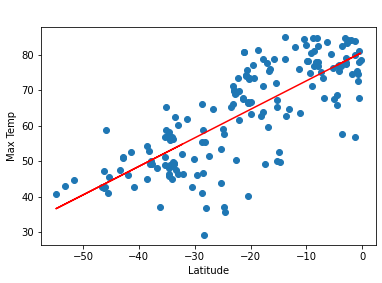

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

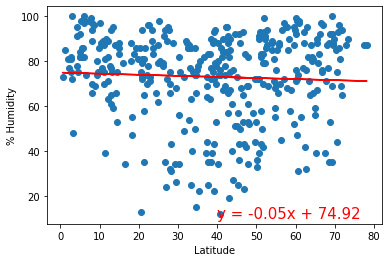

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

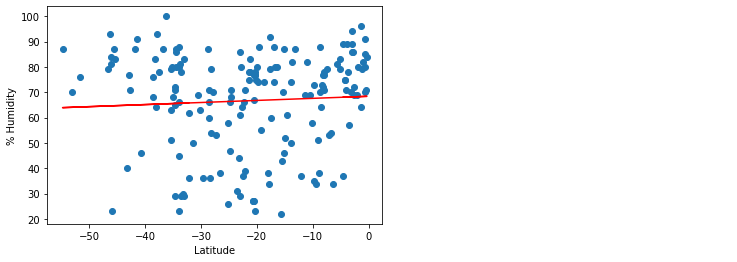

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

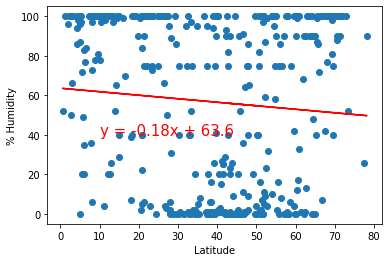

In [39]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,40))

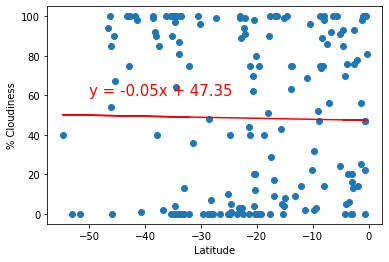

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

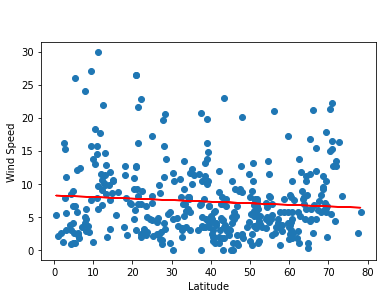

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

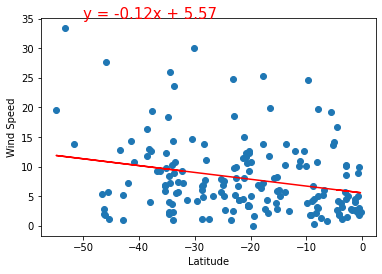

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))